En este proyecto se desarrolla un modelo de redes neuronales para la clasificación de imágenes de dígitos escritos a mano, utilizando la base de datos MNIST. El objetivo principal es construir, entrenar y evaluar un modelo capaz de reconocer correctamente los números del 0 al 9.

Además, se generan nuevas imágenes que son procesadas y evaluadas para analizar la capacidad de generalización del modelo y discutir posibles fuentes de error.

Primero se importan las librerias y se verifica que el ambiente sea el correcto para el programa.

In [ ]:
# Install specific versions
# !pip install tensorflow==2.13.0
# !pip install opencv-python==4.8.0.74

In [ ]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
import cv2
print(cv2.__version__)

2.18.0
4.11.0


In [ ]:
# Check if TensorFlow is using the GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print(f'Found GPU at: {device_name}')

Found GPU at: /device:GPU:0


Se descarga la base de datos de imagenes con los numeros.

In [ ]:
# Import dataset
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Se muestran las proporciones de la base de datos.

In [ ]:
# Print the shape of data
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


Podemos ver que para las imagenes de entrenamiento hay 60000 datos y para las de prueba hay 100000. Ademas, que las proporciones de la imagen son 28x28 pixeles.

Se muestran las proporciones de imagenes por clases/numeros de prueba y entrenamien.to

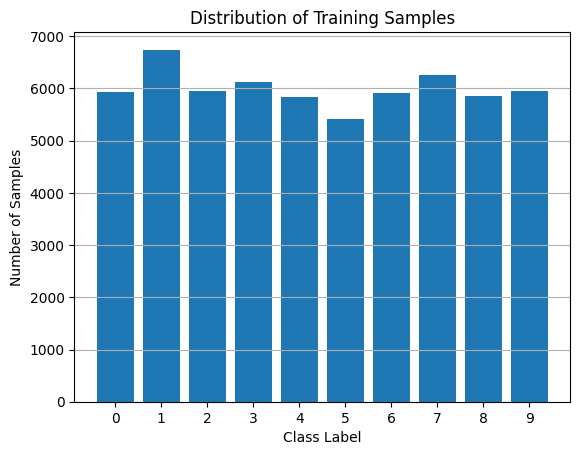

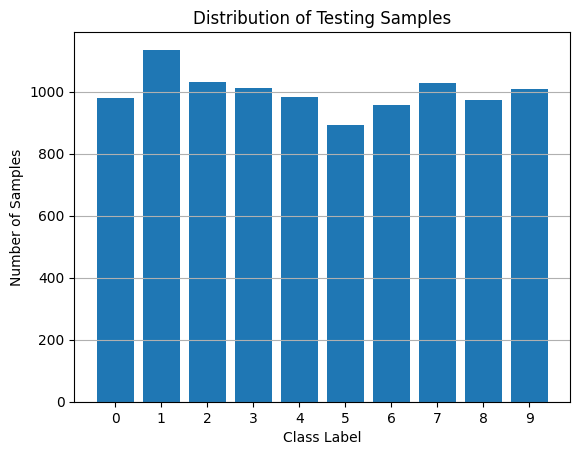

In [ ]:
# Check class proportions
unique, counts = np.unique(train_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Training Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()

unique, counts = np.unique(test_labels, return_counts=True)
plt.bar(unique, counts, tick_label=unique)
plt.title('Distribution of Testing Samples')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y')
plt.show()


Vemos que en su mayoria estan separados los datos equilibradamente por clases excepto por algunas clases.

Se mostraran algunos ejemplos de las imagenes que se utilizan para entrenar el modelo.

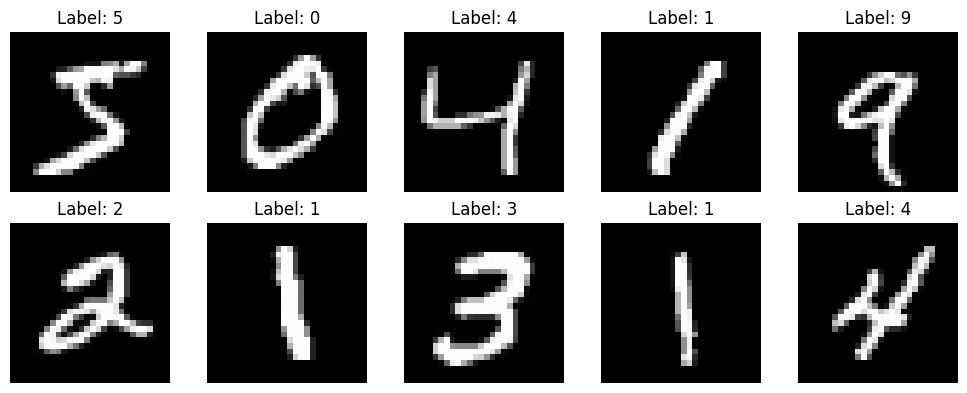

In [ ]:
# Plotting first few images from the training set
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')  # Turn off axis numbers
plt.tight_layout()
plt.show()

Podemos ver que las imagenes tienen los numeros centrados ocupando la mayoria de la imagen y tienen el fondo negro y el numero en blanco. Es importante mencionar esto, debido a que sera necesario tomarlo en cuanto para las pruebas y el analisis.

Se muestra el valor mínimo y máximo de los pixeles en el conjunto de datos de entrenamiento, ayudando a entender el rango de valores que tienen las imágenes.

In [ ]:
# Range of the data
print(f"Min pixel value in training set: {train_images.min()}")
print(f"Max pixel value in training set: {train_images.max()}")

Min pixel value in training set: 0
Max pixel value in training set: 255


Se genera el modelo con 4 capas, 1 de imput, 2 escondidas y 1 de salida; y se mostraran las caracteristicas del modelo.

In [ ]:
# Import keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create simple feedforward neural network
model = Sequential()
# Input Layer: Flatten the 28x28 image data
model.add(Flatten(input_shape=(28, 28)))
# Hidden Layer 1: 128 units with ReLU activation
model.add(Dense(128, activation='relu'))
# Hidden Layer 2: 64 units with ReLU activation
model.add(Dense(64, activation='relu'))
# Output Layer: 10 units for 10 classes with softmax activation for probability distribution
model.add(Dense(10, activation='softmax'))
# Specify optimizer
opt = Adam(learning_rate=0.0001)
# Compile the model
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Print a summary of the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Se observa en el codigo que el modelo comienza a partir de una capa Flatten, que transforma las imágenes de entrada de tamaño 28x28 en un vector unidimensional. Luego, se añaden dos capas ocultas densamente conectadas (Dense) con 128 y 64 neuronas respectivamente, ambas usando la función de activación ReLU para introducir no linealidad. La capa de salida tiene 10 neuronas (una por cada dígito del 0 al 9) y utiliza la función softmax para producir una distribución de probabilidades. Finalmente, el modelo se compila utilizando el optimizador Adam con una tasa de aprendizaje de 0.0001, eligiendo como función de pérdida sparse_categorical_crossentropy adecuada para clasificación multiclase, y se especifica que se monitoreará la métrica de precisión.

Ahora se crea una función de detención temprana (EarlyStopping) que monitorea la exactitud de validación y detiene el entrenamiento si no mejora después de 4 épocas, restaurando los mejores pesos. Luego, se entrena el modelo usando los datos de entrenamiento, reservando el 40% para validación, durante un máximo de 50 épocas o hasta que la detención temprana se active.

In [ ]:
# Create early stoppingg callback
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
# Training the model
history = model.fit(train_images, train_labels, epochs=50, validation_split=0.4, batch_size=80, callbacks=[early_stop])

Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4356 - loss: 32.0660 - val_accuracy: 0.7912 - val_loss: 4.0411
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8110 - loss: 3.3209 - val_accuracy: 0.8451 - val_loss: 2.4917
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8607 - loss: 1.9671 - val_accuracy: 0.8693 - val_loss: 1.8619
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8899 - loss: 1.3051 - val_accuracy: 0.8793 - val_loss: 1.5550
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9095 - loss: 0.9633 - val_accuracy: 0.8912 - val_loss: 1.3671
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9231 - loss: 0.7425 - val_accuracy: 0.8968 - val_loss: 1.2197
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9314 - loss: 0.5699 - val_accuracy: 0.9006 - val_loss: 1.1411
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9427 - loss: 0.4500 - val_accuracy: 0

En la última época antes de detenerse, el modelo alcanzó una alta precisión en entrenamiento (99.61%), indicando que aprendió muy bien los patrones de los datos de entrenamiento. Sin embargo, la precisión en validación fue menor (94.04%) y la pérdida de validación fue relativamente alta (0.7815), lo que sugiere que el modelo comenzó a sobreajustarse (overfitting), sin embargo, siguen siendo muy buenos resultados.

Se generan dos gráficas que muestran la evolución de la precisión y la pérdida durante el entrenamiento y validación del modelo, marcando además la época en la que se activó la detención temprana

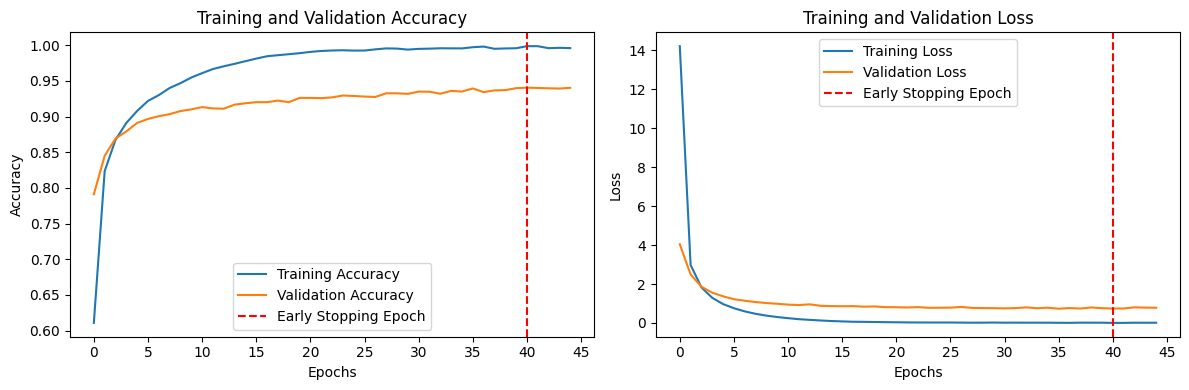

In [ ]:
# Plotting the training and validation accuracy
from matplotlib.ticker import MaxNLocator

stopped_epoch = early_stop.stopped_epoch
best_epoch = stopped_epoch - early_stop.patience

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer values on x-axis
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axvline(x=best_epoch, color='r', linestyle='--', label='Early Stopping Epoch')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer values on x-axis
plt.legend()

plt.tight_layout()
plt.show()

Las graficas nos muestran que hay sobreajuste ya que hay un mejor desempeño para el entrenamiento que la validación, pero siguen siendo buenos resultados, ya que el valor de precisión de validación es mayor a 0.9 y casi siempre se encuentra sobreajuste en este tipo de modelo.

Se genera una funcion para tomar una foto con la camara de la laptop para hacer mis propias pruebas.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

In [ ]:
# Capture an image
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

Se necesita adaptar la imagen al formato de las imagenes de entrenamiento del modelo para poder hacer las pruebas correctamente y ver el desempeño del modelo.

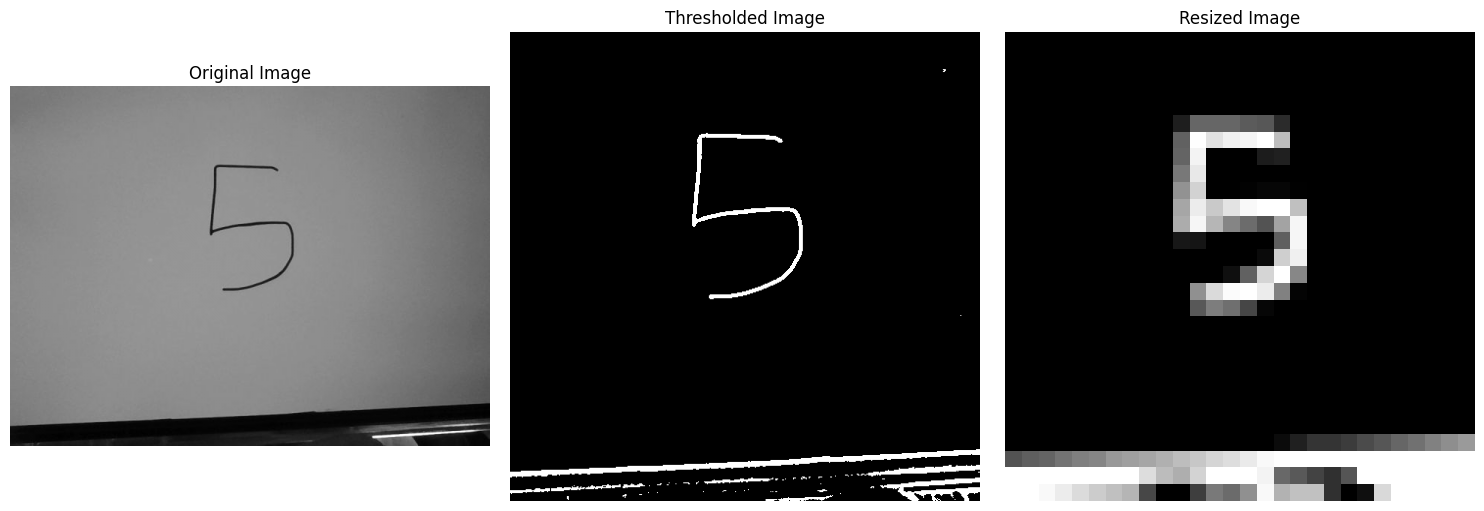

In [ ]:
# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Recorte centrado para hacerlo cuadrado
h, w = image.shape
min_dim = min(h, w)
start_x = (w - min_dim) // 2
start_y = (h - min_dim) // 2
image_cropped = image[start_y:start_y + min_dim, start_x:start_x + min_dim]

# 2. Filtro para reducir ruido (suavizado leve)
blur = cv2.GaussianBlur(image_cropped, (7, 7), 0)


# 3. Binarización adaptativa (mejor que threshold fijo)
thresh = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 2
)

# 4. Apertura (erosión + dilatación) para quitar puntos de ruido
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# 4. Dilatación para intensificar trazos del número
dilated = cv2.dilate(opening, kernel, iterations=9)

# Redimensionar al tamaño que desees (ej: 28x28)
resized = cv2.resize(dilated, (28, 28), interpolation=cv2.INTER_AREA)

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

Se tenian que hacer algunos ajustes al codigo original para que las imagenes estuvieran bien preparadas para darselas al modelo y las identifique. Estas fueron las mejoras:
1. Recortar la imagen para que no se apachurre al momento de ajustarla a las proporciones que necesita el modelo
2. Agregar filtro para reducir el ruido para que se pueda diferenciar mas entre el color blanco y negro
3. Adaptacion de Threshhold para que sea mejor identificando entre diferentes numeros.
4. Intensificar los colores en blanco y negro

In [ ]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   1.00000
The predicted digit is: 9


Vemos que aunque se le proporcionó una imagen con un 5 claro, el modelo dijo que con 100% de probabilidad era un 9. Probablemente se debe a la posicion del numero, su tamaño, el blanco en la parte inferior de la imagen y lo intenso del blanco del numero.

Podemos concluir que el modelo aunque mostraba ser muy bueno para los datos de validación, no era muy bueno con las pruebas de la camara. Aun asi, en ciertos números en la camara era bueno como con el cuatro, que lograba identificar en su mayoria de las veces, sin embargo, en en otros numeros sus errores se pueden deber principalmente debido a caracteristicas como la posición y tamaño de los números.

In [ ]:
# Save the model
model.save("my_model.h5")

In [ ]:
%%writefile real_time_prediction.py

import cv2
import numpy as np
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("my_model.h5")

cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the image for prediction
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, threshed = cv2.threshold(gray, 105, 255, cv2.THRESH_BINARY_INV)
        resized = cv2.resize(threshed, (28, 28))
        input_img = resized.reshape(1, 28, 28, 1)

        # Predict
        prediction = model.predict(input_img)
        predicted_label = np.argmax(prediction)

        # Display prediction on the frame
        frame_with_prediction = cv2.putText(frame, str(predicted_label), (10, 30),
                                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the original frame with prediction
        cv2.imshow('Real-time prediction', frame_with_prediction)

        # Display the resized image in a different window
        # We upscale it so that it's easier to see
        upscaled_resized = cv2.resize(resized, (280, 280), interpolation=cv2.INTER_NEAREST)
        cv2.imshow('Resized Image', upscaled_resized)

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass
finally:
    cap.release()
    cv2.destroyAllWindows()